In [5]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib.pyplot as plt
from os import path

from deployment_instance.Result import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_exfiltration_time_df, get_data_exfiltration_cdf, total_control_host_capture_times
from statistics import mean
import seaborn as sns
# set seaborn font size
sns.set_theme(font_scale=1.5)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("pastel")

import pandas as pd

In [6]:
# Equifax reactive
equifax_advancedReactive_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d10_h0'))
equifax_advancedReactive_d0_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d0_h50'))
equifax_advancedReactive_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveStandalone_d10_h50'))
equifax_advancedReactive_layered_d10_h50 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveLayered_d10_h50'))


In [7]:
equifax_reactiveSimple_d10_h0 = ingest_experiment_results(path.join('data/EquifaxLarge/reactive/equifax/baseline_reactiveSimple_d10_h0'))
equifax_advancedReactive_d10_h0_times = get_exfiltration_time_df(equifax_advancedReactive_d10_h0, 48, 'targeted_advancedReactive_d10_h0')
equifax_advancedReactive_d0_h50_times = get_exfiltration_time_df(equifax_advancedReactive_d0_h50, 48, 'targeted_advancedReactive_d0_h50')
equifax_advancedReactive_d10_h50_times = get_exfiltration_time_df(equifax_advancedReactive_d10_h50, 48, 'targeted_advancedReactive_d10_h50')
equifax_advancedReactive_layered_d10_h50_times = get_exfiltration_time_df(equifax_advancedReactive_layered_d10_h50, 48, 'targeted_advancedReactive_d10_h50')

# Merge dfs into 1 df
equifax_data = pd.concat([equifax_advancedReactive_d10_h0_times, 
                          equifax_advancedReactive_d0_h50_times, 
                          equifax_advancedReactive_d10_h50_times,
                          equifax_advancedReactive_layered_d10_h50_times])

In [12]:
equifax_data_agg = (
    equifax_data.groupby('experiment')
    .agg({'percent_files_exfiltrated': {'mean'}, 'time_exfiltrated': 'median', 'defender': 'first', 'attacker': 'first'})
    .reset_index()
)
equifax_data_agg

,experiment,percent_files_exfiltrated,time_exfiltrated,defender,attacker
,,mean,time_exfiltrated,defender,attacker
0,baseline_reactiveLayered_d10_h50,8.958333,5.980108,targeted_advancedReactive_d10_h50,EquifaxBaselineAttacker
1,baseline_reactiveStandalone_d0_h50,22.916667,9.369579,targeted_advancedReactive_d0_h50,EquifaxBaselineAttacker
2,baseline_reactiveStandalone_d10_h0,100.000000,39.282219,targeted_advancedReactive_d10_h0,EquifaxBaselineAttacker
3,baseline_reactiveStandalone_d10_h50,13.446970,8.730047,targeted_advancedReactive_d10_h50,EquifaxBaselineAttacker


<Axes: xlabel='experiment', ylabel='percent_files_exfiltrated'>

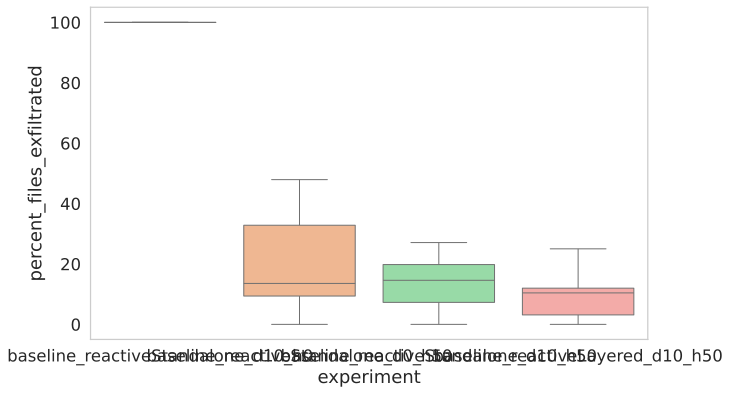

In [15]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=equifax_data, x='experiment', y='percent_files_exfiltrated',
            hue='experiment', palette='pastel', showfliers=False)